In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import numpy as np

In [2]:
# Import dataset
chipo = pd.read_csv(os.getcwd() + '/data/chipotle_1.tsv', sep='\t')
# show first 10 lines
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
# Show last 10 lines
chipo.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [4]:
# Show data infomation
chipo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [5]:
# show describe
chipo.describe(include = 'all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


In [6]:
# 2. Data processing
# a) Change data type of item_price column to float
chipo['item_price']=chipo['item_price'].str.replace('$','').astype('float')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


In [7]:
# b) create column unit_price, with unit_price = item_price/quantity
chipo['unit_price'] = chipo['item_price'] / chipo['quantity']
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,unit_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39
1,1,1,Izze,[Clementine],3.39,3.39
2,1,1,Nantucket Nectar,[Apple],3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49


In [8]:
# c) create columns 'type' with value 'Steak','Chicken' if dish name has
# 'steak', 'chicken' in, otherwise the type is Other
chipo['type'] = chipo['item_name'].apply(lambda x: 'Steak' if 'steak' in x.lower()
                                         else 'Chicken' if 'chicken' in x.lower() else 'Other')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price,unit_price,type
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,Other
1,1,1,Izze,[Clementine],3.39,3.39,Other
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,Other
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,Other
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,Chicken


In [9]:
# d) Remove duplicates
chipo.drop_duplicates()

,order_id,quantity,item_name,choice_description,item_price,unit_price,type
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,2.39,Other
1,1,1,Izze,[Clementine],3.39,3.39,Other
2,1,1,Nantucket Nectar,[Apple],3.39,3.39,Other
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,2.39,Other
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,8.49,Chicken
...,...,...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",11.75,11.75,Steak
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",11.75,11.75,Steak
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",11.25,11.25,Chicken
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75,8.75,Chicken


In [10]:
# 3. Create dataframe orders includes the information about orders by
# grouping orders and the total value of each order
df_1=chipo.groupby('order_id')['unit_price'].sum()

In [11]:
df_2=chipo.groupby('order_id')['item_name'].size()

In [12]:
orders = pd.merge(df_2, df_1, on='order_id', how = 'inner')
orders.rename(columns={'item_name':'num_item', 'unit_price':'revenue'}, inplace=True)
orders.head()

,num_item,revenue
order_id,,
1,4,11.56
2,1,8.49
3,2,12.67
4,2,21.00
5,2,13.70


In [13]:
# 4. show the number of orders, the total revenue on the sale date
orders.reset_index(inplace=True)

In [14]:
print('Số lượng đơn hàng: ', orders['order_id'].count())
print('Tổng doanh thu: $', orders['revenue'].sum())

Số lượng đơn hàng:  1834
Tổng doanh thu: $ 32744.21


<Axes: xlabel='num_item', ylabel='revenue'>

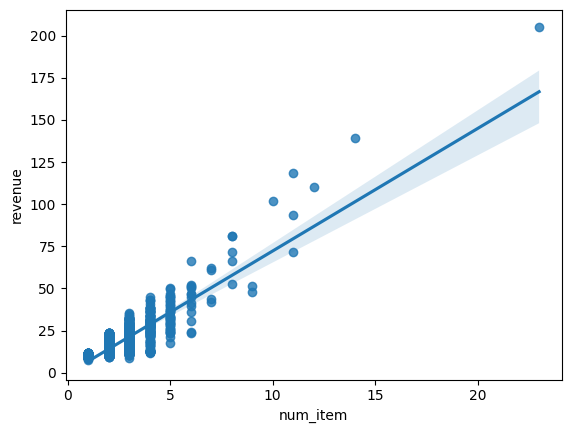

In [15]:
# 5. Draw regression plot between num_item and revenue
sns.regplot(orders, x='num_item', y = 'revenue')

In [16]:
# 6. Draw a graph showing top 10 most ordered dishes (with the most orders)
df_top10 = chipo.groupby(by = ['item_name'], as_index = False)['quantity'].sum()
df_top10 = df_top10.sort_values(by =['quantity'],ascending=False).head(10)
df_top10.dtypes

item_name    object
quantity      int64
dtype: object

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Chicken Bowl'),
  Text(1, 0, 'Chicken Burrito'),
  Text(2, 0, 'Chips and Guacamole'),
  Text(3, 0, 'Steak Burrito'),
  Text(4, 0, 'Canned Soft Drink'),
  Text(5, 0, 'Chips'),
  Text(6, 0, 'Steak Bowl'),
  Text(7, 0, 'Bottled Water'),
  Text(8, 0, 'Chips and Fresh Tomato Salsa'),
  Text(9, 0, 'Canned Soda')])

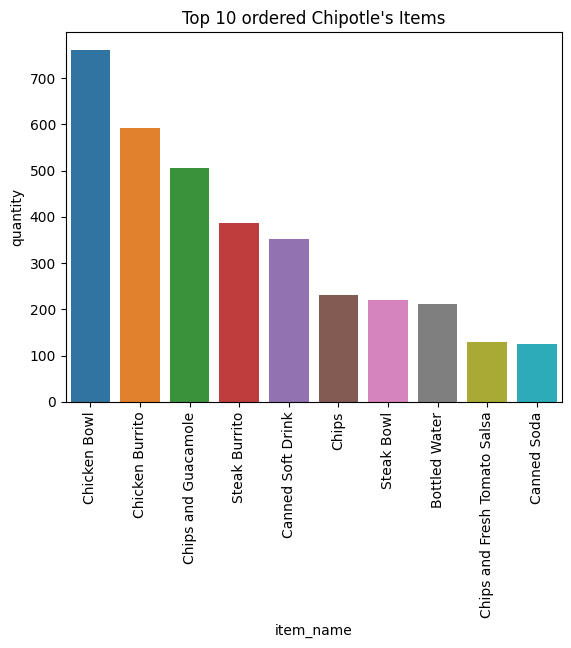

In [17]:
# sns.barh(df_top10['item_name'], df_top10['quantity'])
# plt.title('Top 10 ordered Chipotle\'s Items')
sns.barplot(x=df_top10.item_name, y=df_top10.quantity)
plt.title("Top 10 ordered Chipotle's Items")
plt.xticks(rotation=90)

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1800x400 with 0 Axes>

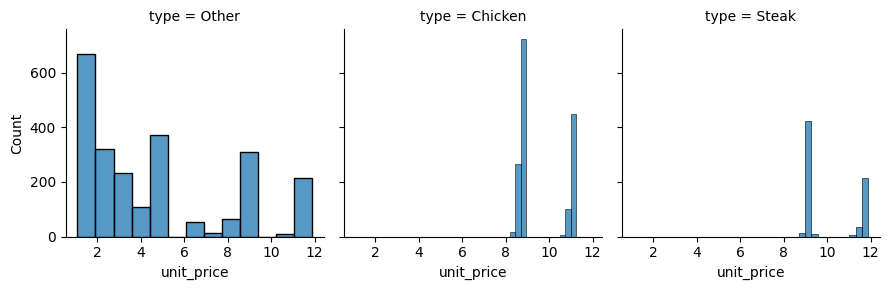

In [18]:
# 7. show the distribution of unit_price by type dish 
plt.figure(figsize=(18,4))
g= sns.FacetGrid(data=chipo, col='type')
g.map(sns.histplot, 'unit_price')

<Axes: xlabel='unit_price', ylabel='type'>

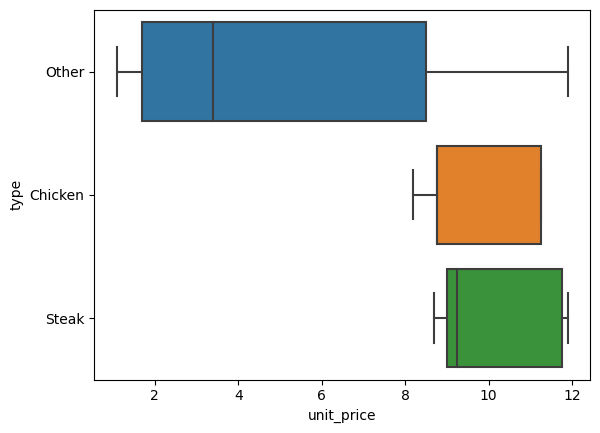

In [19]:
# Draw a box plot of unit_price by type food
sns.boxplot(data=chipo, y = 'type', x = 'unit_price')

In [20]:
# 9. Draw a statistical chart of total sales by type of dish
dk = chipo.groupby('type')['unit_price'].sum()
dk = pd.DataFrame(dk).reset_index()
dk


,type,unit_price
0,Chicken,14931.57
1,Other,10745.37
2,Steak,7067.27


Text(0, 0.5, 'Total revenue')

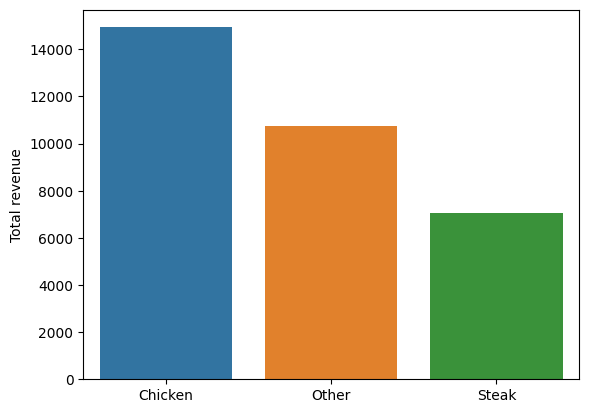

In [21]:
sns.barplot(dk, x='type', y='unit_price')
plt.xlabel('')
plt.ylabel('Total revenue')

c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


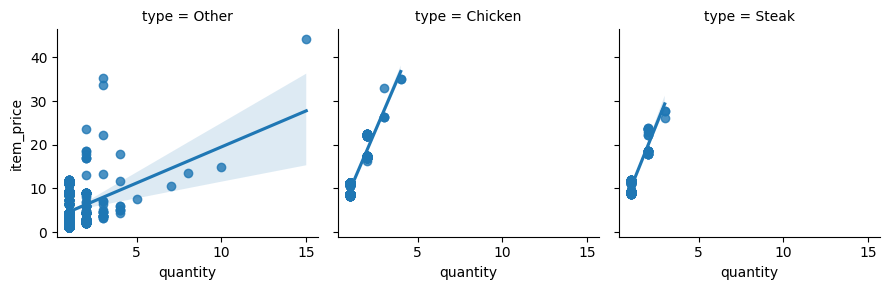

In [22]:
# 10. Draw a graph of the relationship between item_price and quantity,
# analyze by type of dish
g = sns.FacetGrid(chipo, col='type')
g.map(sns.regplot, 'quantity', 'item_price')
plt.show()

<Axes: >

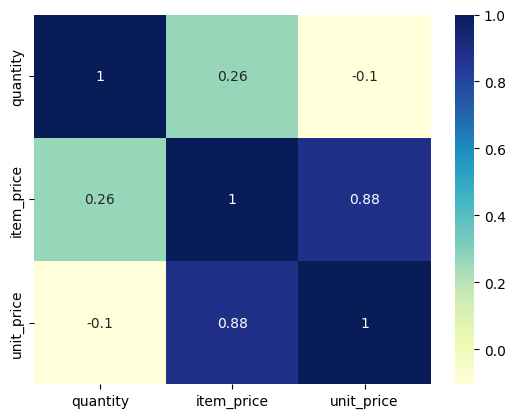

In [23]:
# 11. Draw a heatmap chart showing the correlation between the columns quantity, item_price, unit_price
dt = chipo[['quantity', 'item_price', 'unit_price']]
sns.heatmap(dt.corr(), annot=True, cmap='YlGnBu')